<a href="https://colab.research.google.com/github/abhishektripathi66/RecomendationSystem/blob/main/next_word_predictor_using_lstms_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      S

In [2]:
text = """Abhishek is a very good boy.
Abhishek is kind.
Abhishek is well.
Abhishek is fine.
I am studying in Delhi Technological University.
I am living in Delhi.
I am a self learner.
I want to learn new skills everyday.
I go to walk early in the morning.
Do you want to tour in UK."""

# let's perform some **preprocessing** on text...

In [3]:
import re

# Lowercasing the text
lowercase_text = text.lower()

# Removing extra newlines between sentences
cleaned_text = re.sub(r'\n\s*\n', '\n', lowercase_text)

print("Lowercased Text with Extra Newlines Removed:\n")
print(cleaned_text)

Lowercased Text with Extra Newlines Removed:

abhishek is a very good boy. 
abhishek is kind.
abhishek is well.
abhishek is fine.
i am studying in delhi technological university.
i am living in delhi.
i am a self learner.
i want to learn new skills everyday.
i go to walk early in the morning.
do you want to tour in uk.


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([cleaned_text])

# to see, what numbers are allocated to what words, there's an attribute name "word_index"

In [6]:
tokenizer.word_index

{'i': 1,
 'abhishek': 2,
 'is': 3,
 'in': 4,
 'am': 5,
 'to': 6,
 'a': 7,
 'delhi': 8,
 'want': 9,
 'very': 10,
 'good': 11,
 'boy': 12,
 'kind': 13,
 'well': 14,
 'fine': 15,
 'studying': 16,
 'technological': 17,
 'university': 18,
 'living': 19,
 'self': 20,
 'learner': 21,
 'learn': 22,
 'new': 23,
 'skills': 24,
 'everyday': 25,
 'go': 26,
 'walk': 27,
 'early': 28,
 'the': 29,
 'morning': 30,
 'do': 31,
 'you': 32,
 'tour': 33,
 'uk': 34}

# now we'll try to create a dataset from this text as a supervised learning task dataset, where there's an input and an output
> ### for ex. if text = "How are you all?"
===========================================
> ### Input: **How**
> ### Output: **are**
===========================================
> ### Input: **How are**
> ### Output: **you** and so on...

In [7]:
input_sequences = []
for sentence in cleaned_text.split("\n"):
    # convert words into numbers
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
    print(tokenized_sentence)

    for i in range(1, len(tokenized_sentence)):
        input_sequences.append(tokenized_sentence[:i+1])

[2, 3, 7, 10, 11, 12]
[2, 3, 13]
[2, 3, 14]
[2, 3, 15]
[1, 5, 16, 4, 8, 17, 18]
[1, 5, 19, 4, 8]
[1, 5, 7, 20, 21]
[1, 9, 6, 22, 23, 24, 25]
[1, 26, 6, 27, 28, 4, 29, 30]
[31, 32, 9, 6, 33, 4, 34]


# the input shape must be same when passing the sequences into the neural networks, so for that we will applying **padding** in front of every sentence with respect to which sentence has max. number of words.

In [8]:
max_length = max([len(x) for x in input_sequences])
max_length # there present a sentence which has maximum 111 words.

8

# now we'll apply **zero_padding**

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_length, padding='pre')

In [11]:
padded_input_sequences

array([[ 0,  0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  2,  3,  7],
       [ 0,  0,  0,  0,  2,  3,  7, 10],
       [ 0,  0,  0,  2,  3,  7, 10, 11],
       [ 0,  0,  2,  3,  7, 10, 11, 12],
       [ 0,  0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  2,  3, 13],
       [ 0,  0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  2,  3, 14],
       [ 0,  0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  2,  3, 15],
       [ 0,  0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  0,  1,  5, 16],
       [ 0,  0,  0,  0,  1,  5, 16,  4],
       [ 0,  0,  0,  1,  5, 16,  4,  8],
       [ 0,  0,  1,  5, 16,  4,  8, 17],
       [ 0,  1,  5, 16,  4,  8, 17, 18],
       [ 0,  0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  0,  1,  5, 19],
       [ 0,  0,  0,  0,  1,  5, 19,  4],
       [ 0,  0,  0,  1,  5, 19,  4,  8],
       [ 0,  0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  0,  1,  5,  7],
       [ 0,  0,  0,  0,  1,  5,  7, 20],
       [ 0,  0, 

In [12]:
X = padded_input_sequences[:,:-1]
y = padded_input_sequences[:,-1]

In [13]:
X

array([[ 0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  2,  3,  7],
       [ 0,  0,  0,  2,  3,  7, 10],
       [ 0,  0,  2,  3,  7, 10, 11],
       [ 0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  5, 16],
       [ 0,  0,  0,  1,  5, 16,  4],
       [ 0,  0,  1,  5, 16,  4,  8],
       [ 0,  1,  5, 16,  4,  8, 17],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  5, 19],
       [ 0,  0,  0,  1,  5, 19,  4],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  5,  7],
       [ 0,  0,  0,  1,  5,  7, 20],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  9],
 

In [15]:
y

array([ 3,  7, 10, 11, 12,  3, 13,  3, 14,  3, 15,  5, 16,  4,  8, 17, 18,
        5, 19,  4,  8,  5,  7, 20, 21,  9,  6, 22, 23, 24, 25, 26,  6, 27,
       28,  4, 29, 30, 32,  9,  6, 33,  4, 34], dtype=int32)

# now from our dataset (X and y), as we have **discrete values**, we can use **multi-class classification.**

In [16]:
X.shape, y.shape

((44, 7), (44,))

> #### X.shape = (1478, 110) => means **in each sentence there are 110 words** and there are **total 1478 sentences**.

# now we'll **ONE HOT ENCODE** the y, which is currently a scaler.

In [17]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=len(tokenizer.word_index)+1)
# +1 because OHE starts from 0 and word_index returned output started from 1

In [18]:
y.shape     # (1478, 535), 535 because there are total 535 words in our vocabulary.

(44, 35)

In [26]:
 y_rows, y_cols = y.shape

In [27]:
y   # each sentence is represented by a sparse vector having 535 values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Now we're reading with **TRAINING THE DATA**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
model = Sequential()
model.add(Embedding(input_dim=y_cols, output_dim=max_length))
# there are total 535 words in our vocabulary and 110 is the length of each sentence
model.add(LSTM(units=256))
model.add(Dense(units=y_cols, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor="accuracy", patience=100, restore_best_weights=True)
history = model.fit(X, y, epochs=200, callbacks=[early_stopping])

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0152 - loss: 3.5559  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0407 - loss: 3.4771
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0767 - loss: 3.3677
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0767 - loss: 3.3420
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1117 - loss: 3.2674
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1326 - loss: 3.1757
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2093 - loss: 3.0361 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1326 - loss: 3.0851 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3068 - loss: 2.9304
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1733 - loss: 2.7682 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2500 - loss: 2.7187
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2339

# Knowing the summary of the model...

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 7, 8)                │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         271,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 35)                  │           8,995 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841,907 (3.21 MB)

 Trainable params: 280,635 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 561,272 (2.14 MB)

# Let's plot accuracy v/s loss curve

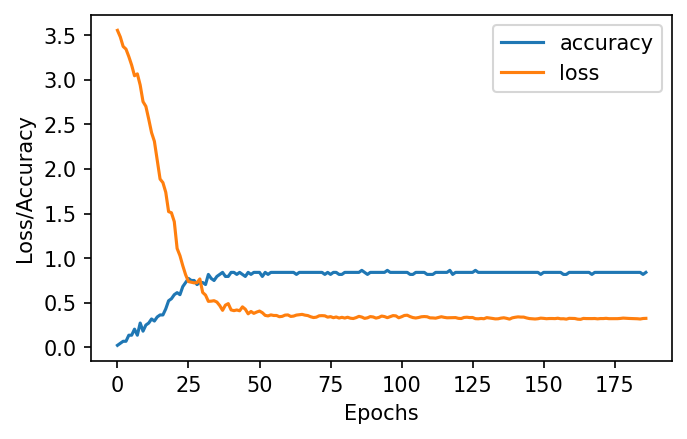

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

plot_1 = pd.DataFrame(history.history)
plt.figure(dpi=150, figsize = (5,3))
plt.plot(plot_1)
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(plot_1)

# Finally let's watch the output on giving **LLMs are** as an input...

In [24]:
import numpy as np
import time

In [31]:
text = "abhishek"

for i in range(6):
    previousword = text.split(" ")[-1]
    # tokenize
    token_text = tokenizer.texts_to_sequences([text])[0]
    print(token_text)
    # padding
    padded_token_text = pad_sequences([token_text], maxlen=max_length, padding='pre')
    print(padded_token_text)
    # predict
    position = np.argmax(model.predict(padded_token_text))

    # print word at the particular position in tokenizer.word_index
    for word, index in tokenizer.word_index.items():
        if index == position:
            text = text + " " + word
            print(text)
            time.sleep(2)

[2]
[[0 0 0 0 0 0 0 2]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
abhishek is
[2, 3]
[[0 0 0 0 0 0 2 3]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
abhishek is a
[2, 3, 7]
[[0 0 0 0 0 2 3 7]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
abhishek is a very
[2, 3, 7, 10]
[[ 0  0  0  0  2  3  7 10]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
abhishek is a very good
[2, 3, 7, 10, 11]
[[ 0  0  0  2  3  7 10 11]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
abhishek is a very good boy
[2, 3, 7, 10, 11, 12]
[[ 0  0  2  3  7 10 11 12]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
abhishek is a very good boy boy


# I think it's performing well :)